GoogleNet

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt

Class Counter: 4
Class Names: ['DEER', 'FOX', 'SQUIRREL', 'WOLF']
Device: cuda


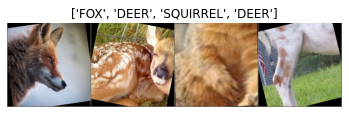

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, optim, lr_scheduler, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
googleNet = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
googleNet.eval()

#num_ftrs = googleNet.classifier.in_features
#googleNet.classifier = nn.Linear(num_ftrs, CLASS_COUNTER)

googleNet = googleNet.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(googleNet.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(googleNet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Using cache found in C:\Users\SsaiyO/.cache\torch\hub\pytorch_vision_v0.10.0


Epoch 0/99
----------
[TRAIN] Loss: 3.8765 Acc: 0.3420 F1-Score: 0.0855 Precision: 0.1286 Recall: 0.0855
[VALID] Loss: 1.8336 Acc: 0.5168 F1-Score: 0.1236 Precision: 0.1861 Recall: 0.1292

Epoch 1/99
----------
[TRAIN] Loss: 1.2901 Acc: 0.6424 F1-Score: 0.1568 Precision: 0.2000 Recall: 0.1616
[VALID] Loss: 0.6049 Acc: 0.8531 F1-Score: 0.2128 Precision: 0.2346 Recall: 0.2133

Epoch 2/99
----------
[TRAIN] Loss: 0.8349 Acc: 0.7503 F1-Score: 0.1913 Precision: 0.2286 Recall: 0.1876
[VALID] Loss: 0.3870 Acc: 0.8995 F1-Score: 0.2264 Precision: 0.2419 Recall: 0.2249

Epoch 3/99
----------
[TRAIN] Loss: 0.6334 Acc: 0.7997 F1-Score: 0.2054 Precision: 0.2360 Recall: 0.2009
[VALID] Loss: 0.3287 Acc: 0.9175 F1-Score: 0.2298 Precision: 0.2423 Recall: 0.2294

Epoch 4/99
----------
[TRAIN] Loss: 0.6726 Acc: 0.7711 F1-Score: 0.2010 Precision: 0.2353 Recall: 0.1928
[VALID] Loss: 0.2471 Acc: 0.9227 F1-Score: 0.2306 Precision: 0.2411 Recall: 0.2307

Epoch 5/99
----------
[TRAIN] Loss: 0.6113 Acc: 0.7945 

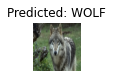

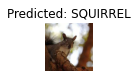

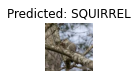

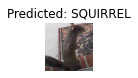

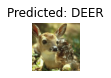

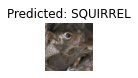

In [5]:
base_model = train_model(googleNet,"googleNet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

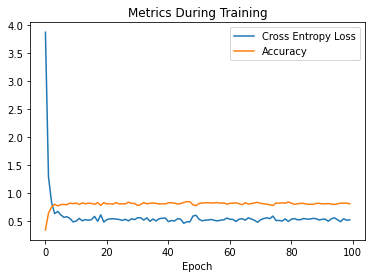

In [6]:
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.title('Metrics During Training');

In [9]:
base_model = test_model(base_model, criterion)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!